In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
filename = '/Volumes/data/piaware/nonapi/flights.log'
df = pd.read_csv(filename,
                     usecols=[4,6,7,8,9,11,14,15],
                     names=['flight','startdate', 'starttime','enddate','endtime',
                            'alt','lat','lon'])
print(len(df))

141347


/Users/ajmendez/.local/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
import smopy

In [51]:
bbox = (-122.2695922852,36.5570846592,-121.4538574219,37.3974371409)
smopy.TILE_SERVER = 'http://a.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png'
smopy.MAXTILES = 32
m = smopy.Map([bbox[1], bbox[0], bbox[3], bbox[2]], zoom=10)

Lowered zoom level to keep map size reasonable. (z = 10)


In [52]:
d = df[df.lat.notnull() & 
       (df.lat != '19:25:53.250')]
x,y = m.to_pixels(d.lat.astype('float'), d.lon.astype('float'))


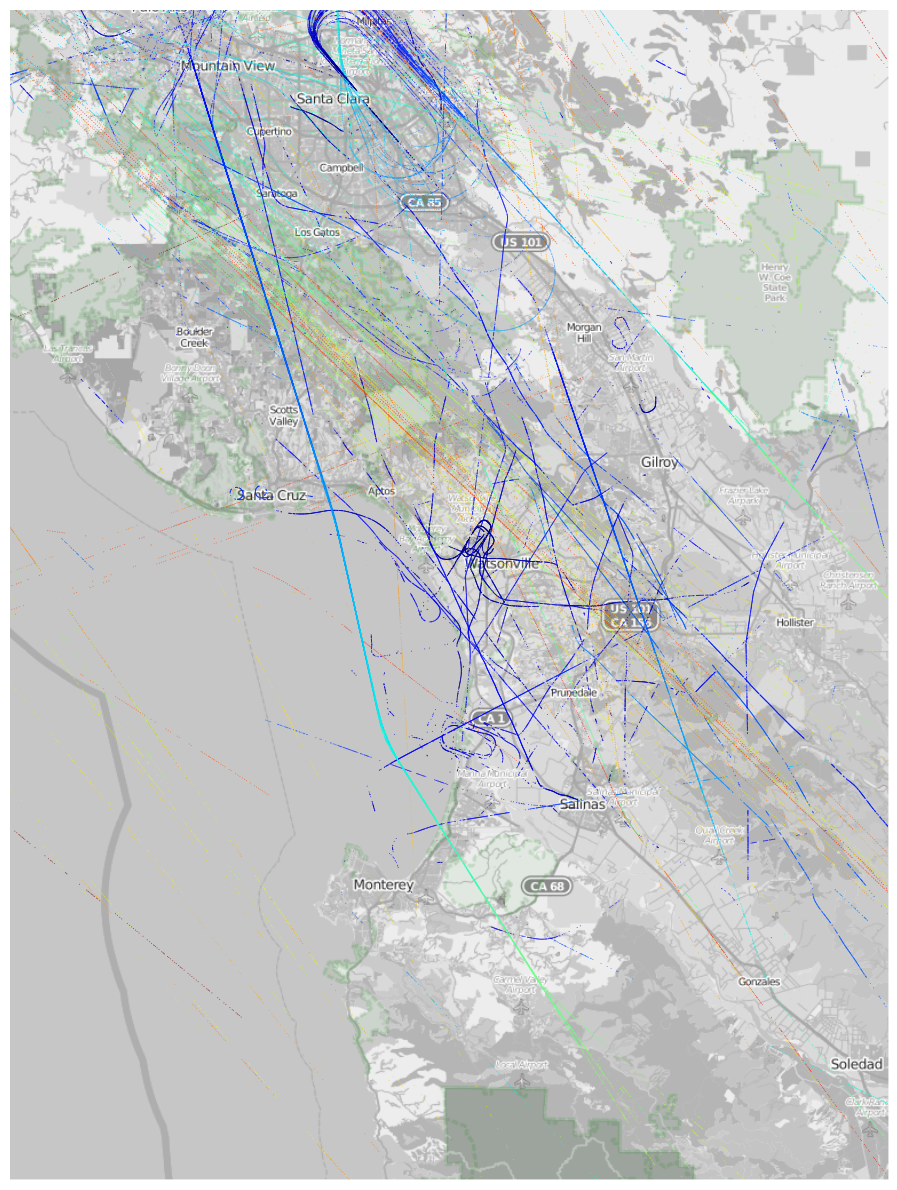

In [53]:
ax = m.show_mpl(figsize=(12,12))
ax.scatter(x,y, c=d.alt, s=0.5, lw=0, alpha=0.7)